In [1]:
import numpy as np
import pandas as pd
import keras

DISPLAY = True

Using TensorFlow backend.


In [3]:
from bc_helper.simulator_data import SimulatorData
from bc_helper.load import load_smooth_data, load_simple_data

orig = load_simple_data()
smooth = load_smooth_data()

orig_data = SimulatorData(orig)
smooth_data = SimulatorData(smooth)

In [4]:
def data_info(sim_data, name):
  # Number of training examples
  n_train = sim_data.num_train
  # Number of testing examples.
  n_test = sim_data.num_test
  # What's the shape of an image?
  image_shape = sim_data.feature_shape
  # Max and min steering angles
  s_max = sim_data.max_label
  s_min = sim_data.min_label

  print(name, "number of training examples =", n_train)
  print(name, "number of testing examples =", n_test)
  print(name, "image data shape =", image_shape)
  print(name, "max steering angle =", s_max)
  print(name, "min steering angle =", s_min)
  
if DISPLAY:
  data_info(orig_data, "Steering Data")
  print()
  data_info(smooth_data, "Smoothed Steering Data")

Steering Data number of training examples = 11410
Steering Data number of testing examples = 4891
Steering Data image data shape = (160, 320, 3)
Steering Data max steering angle = 16300.0
Steering Data min steering angle = 0.0

Smoothed Steering Data number of training examples = 8789
Smoothed Steering Data number of testing examples = 3768
Smoothed Steering Data image data shape = (160, 320, 3)
Smoothed Steering Data max steering angle = 12556.0
Smoothed Steering Data min steering angle = 0.0


Steering angle: -0.04475105


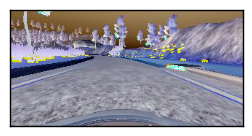

---------------------------------------------------------

Steering angle: 0.0


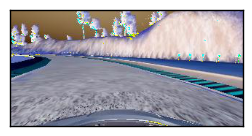

---------------------------------------------------------

Steering angle: 0.0


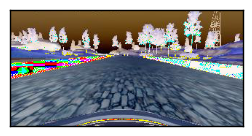

---------------------------------------------------------

Steering angle: 0.0


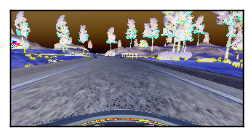

---------------------------------------------------------

Steering angle: 0.0


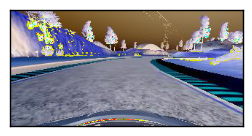

---------------------------------------------------------

Steering angle: 0.0


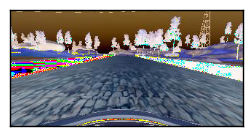

---------------------------------------------------------

Steering angle: -0.07702786


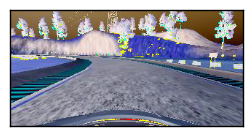

---------------------------------------------------------

Steering angle: 0.0


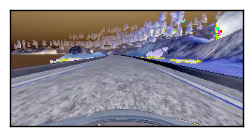

---------------------------------------------------------

Steering angle: 0.0


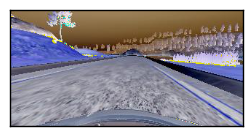

---------------------------------------------------------

Steering angle: 0.3086731


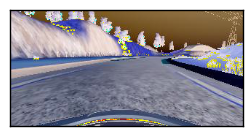

---------------------------------------------------------



In [5]:
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_image(index, data):
  print("Steering angle:", data._df['steering'][index])
  fig = plt.figure(figsize = (3, 3))
  axis = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
  axis.imshow(data.img(index))
  plt.show()
  print("---------------------------------------------------------\n")
  
if DISPLAY:
  for i in range(10):
    display_image(random.randint(0, orig_data.num_train), orig_data)

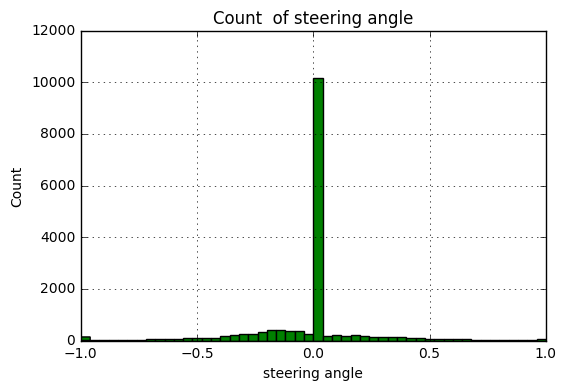

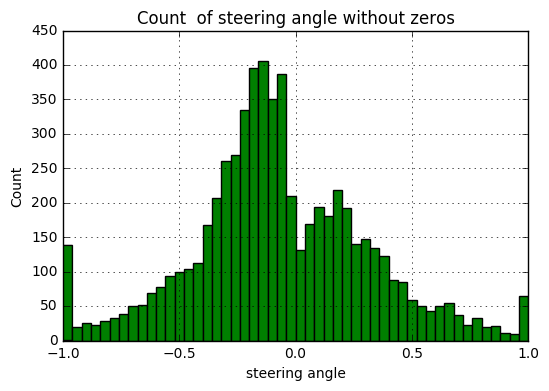

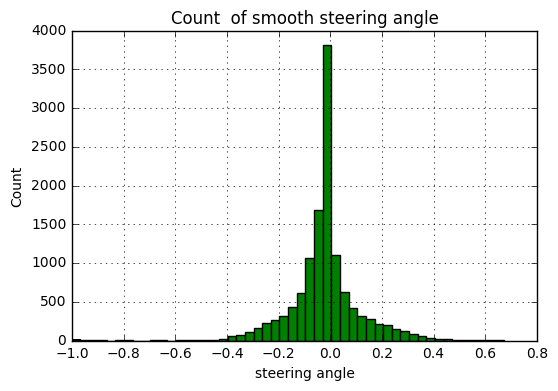

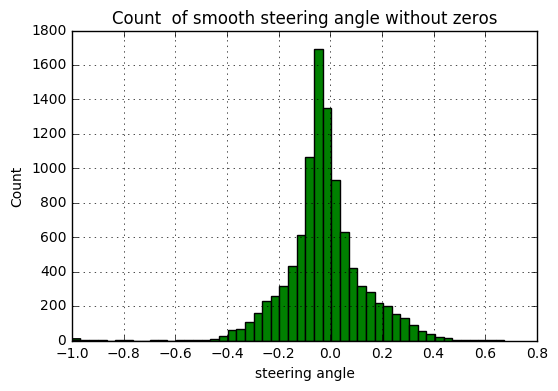

In [7]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data, name):
  n, bins, patches = plt.hist(data, bins=50, facecolor='green')

  plt.xlabel('steering angle')
  plt.ylabel('Count')
  plt.title('Count  of ' + name)
  plt.grid(True)
  plt.show()
  
if DISPLAY:
  hist(orig_data._df['steering'], 'steering angle')
  hist([sa for sa in orig_data._df['steering'] if sa > 0.01 or sa < -0.01], 'steering angle without zeros')
  
  hist(smooth_data._df['smooth_steering'], 'smooth steering angle')
  hist([sa for sa in smooth_data._df['smooth_steering'] if sa > 0.01 or sa < -0.01], 'smooth steering angle without zeros')

Ok! So we clearly have a ton of zeros. but when the zeros are taken out the data is skewed left. This makes sense because both courses were basically counter clockwise circles. 

One fun note, a model could get a really high training by just guessing 0 the whole time. 

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout, Input
import h5py


vgg_model = VGG16(input_tensor=Input(shape=data.feature_shape), include_top=False)
train_predict = vgg_model.predict_generator(data.train_generator(), data.num_train)
test_predict = vgg_model.predict_generator(data.test_generator(), data.num_test)

model = Sequential()
model.add(Flatten(input_shape=train_predict.shape[1:]))
model.add(Dense(1028, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.fit(train_predict, data.train_labels(), nb_epoch=1, validation_data=(test_predict, data.test_labels()))
